# 1 Amplitude Modulation 

<pre>
Consider the following signal
</pre>

\begin{equation}
m(t) = e^{-6t}(u(t-4) - u(t-8)) + e^{6t}(u(-t-4) - u(-t-8))    
\end{equation}


## 1.1
First, plot the signal in the time and frequency domains and declare its bandwidth; Then
sample the signal at an appropriate rate. Explain how this rate is obtaine


In [555]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps
from scipy.signal import butter, lfilter ,detrend , hilbert
import sounddevice as sd
from scipy.io.wavfile import write , read



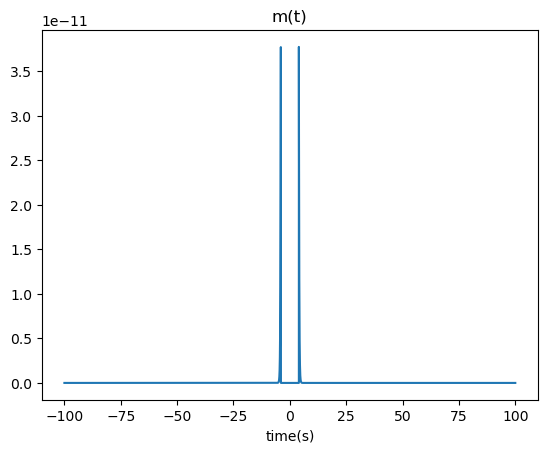

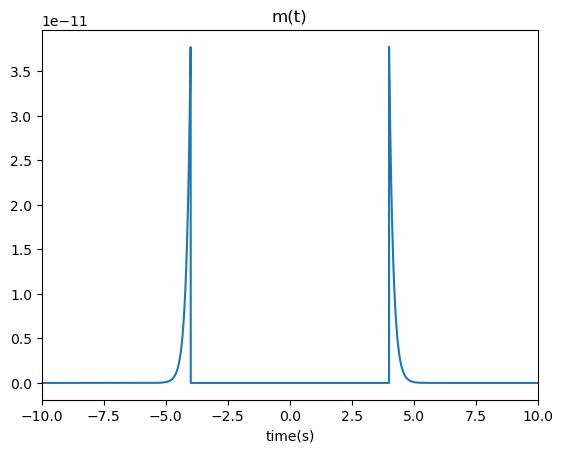

In [557]:
time = np.arange(-100 , 100 , 0.0001)
func = lambda time : np.exp(-6*time) * ( np.heaviside(time-4,1) - np.heaviside(time-8,1)) + np.exp(6*time) * ( np.heaviside(-time-4,1) - np.heaviside(-time-8,1))
m = func(time)
plt.plot(time ,m)
plt.title("m(t)")
plt.xlabel("time(s)")
plt.show()

plt.plot(time ,m)
plt.title("m(t)")
plt.xlabel("time(s)")
plt.xlim(-10,10)
plt.show()

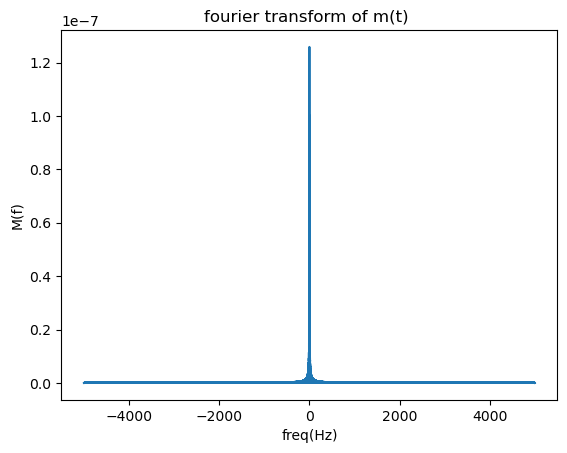

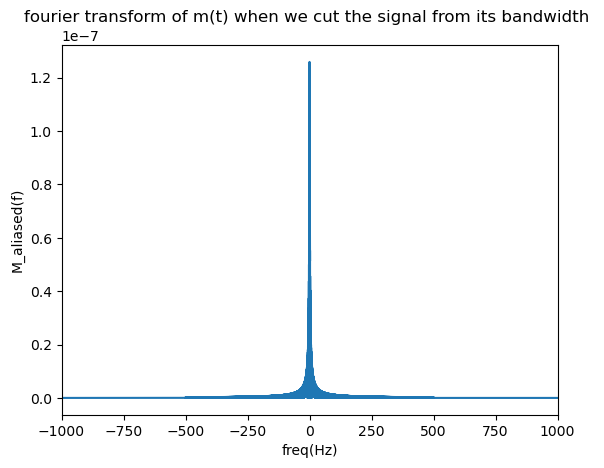

/Users/mohammadkazzazi/anaconda3/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


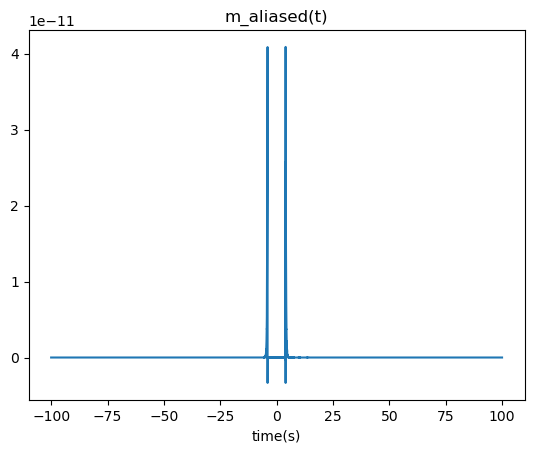

In [559]:
time = np.arange(-100 , 100 , 0.0001)

Mf = np.fft.fft(m)
Mf = np.fft.fftshift(Mf)
N=2000000
fs = 10000
f_range = np.fft.fftfreq(N , 1/fs)  #freq range
f_range = np.fft.fftshift(f_range)

aliased_f = 500
H_aliasing_maker = lambda f : np.heaviside(f+aliased_f , 1) - np.heaviside(f-aliased_f ,1)
H_aliasing = H_aliasing_maker(f_range)
M_aliased = Mf*H_aliasing


plt.plot(f_range , np.abs(Mf))
plt.ylabel("M(f)")
plt.xlabel("freq(Hz)")
plt.title("fourier transform of m(t) ")
#plt.xlim(-1000,1000)
plt.show()


plt.plot(f_range , np.abs(M_aliased))
plt.ylabel("M_aliased(f)")
plt.xlabel("freq(Hz)")
plt.title("fourier transform of m(t) when we cut the signal from its bandwidth ")
plt.xlim(-1000,1000)
plt.show()

m_aliased = np.fft.ifftshift(M_aliased)
m_aliased = np.fft.ifft(m_aliased)
plt.plot(time ,m_aliased)
plt.title("m_aliased(t)")
plt.xlabel("time(s)")
plt.show()



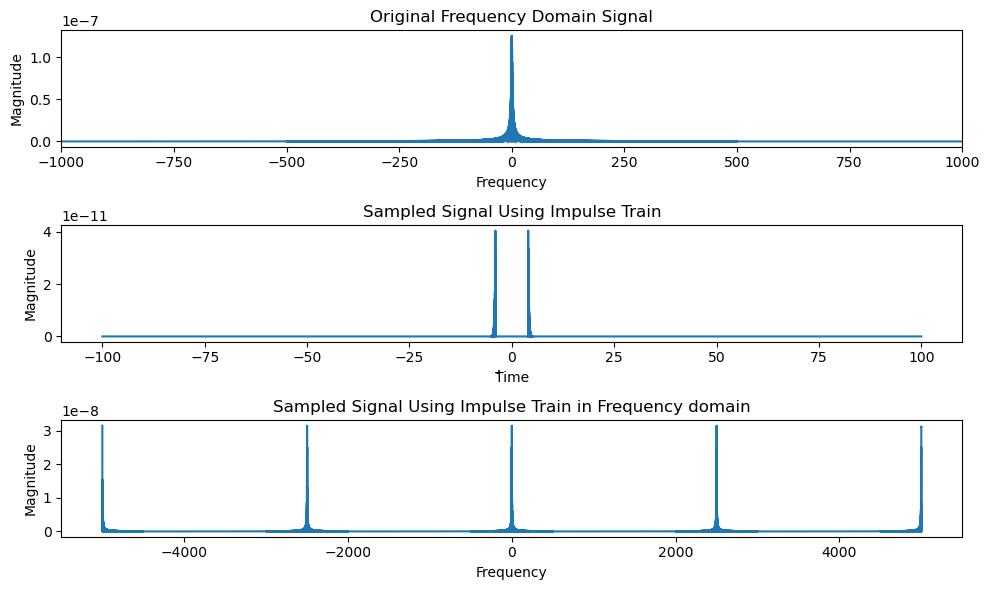

In [560]:
time = np.arange(-100 , 100 , 0.0001)

f_range = np.fft.fftfreq(N , 1/fs)  # make an freq range between (-400000 , 400000) ,step of sampling is 0.01
f_range = np.fft.fftshift(f_range)

# Create the impulse train for sampling
impulse_train = np.zeros_like(time)
impulse_train[::4] = 1  # set every 2th sample to 1




# Sample the m_aliased function using the impulse train
m_aliased_sampled = m_aliased * impulse_train



# Plot the original and sampled signals
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(f_range, np.abs(M_aliased), label='Original signal')
plt.title('Original Frequency Domain Signal')
plt.xlim(-1000,1000)
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

plt.subplot(3, 1, 2)
plt.plot(time, np.abs(m_aliased_sampled),label='Sampled signal')
plt.title('Sampled Signal Using Impulse Train')
plt.xlabel('ُTime')
plt.ylabel('Magnitude')


plt.subplot(3, 1, 3)
sample = np.fft.fft(m_aliased_sampled)
sample = np.fft.fftshift(sample)
plt.plot(f_range, np.abs(sample), label='Sampled signal')
plt.title('Sampled Signal Using Impulse Train in Frequency domain')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')


plt.tight_layout()
plt.show()




<p style="font-size:22px; color:green;">
As you can see, the fourier transform of the signal has been shown and by the desired threshold, we choose the bandwidth 100Hz, and by following Nyquist's law, we choose Impulse train signal period in a way so that the signals do not interfere with each other.  Nyquist's law say that sample period should be less than 1/(2 * BW) of the signal 
</p> 

## 1.2
By defining suitable parameters, modulate this signal with AM modulation. Plot the modulated signal and its spectrum.

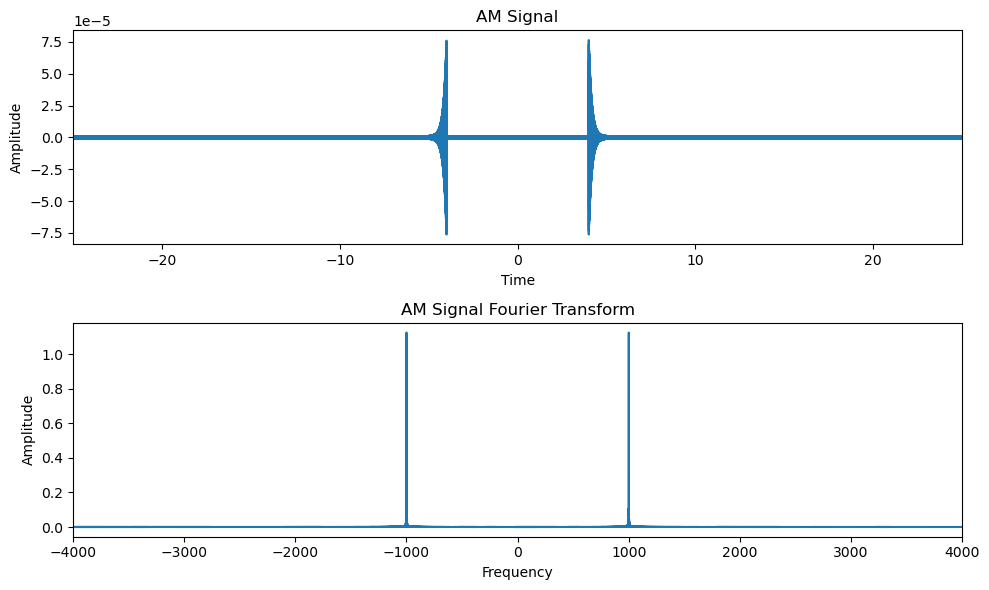

In [561]:
time = np.arange(-100 , 100 , 0.0001)

f_range = np.fft.fftfreq(N , 1/fs)  # make an freq range between (-400000 , 400000) ,step of sampling is 0.01
f_range = np.fft.fftshift(f_range)
# Define the carrier frequency
fc = 1000  # Hz

# Create the carrier signal
carrier_creator = lambda t : np.cos(2 * np.pi * fc * t)
carrier = carrier_creator(time) / 1000000


mu = 10 ** 6 # modulation index
Ac = 2

# Perform amplitude modulation
am_signal = ( Ac * mu * m * 1000000 + 1 ) * carrier

# Plot the modulated signal
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(time, am_signal)
plt.xlim(-25,25)
plt.title('AM Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

AM_f = np.fft.fft(am_signal)
AM_f = np.fft.fftshift(AM_f)

plt.subplot(2, 1, 2)
plt.plot(f_range, np.abs(AM_f))
plt.xlim(-4000, 4000)  # Change the frequency range to (-2000, 2000)
plt.title('AM Signal Fourier Transform')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

## 1.3
The circuit shown in figure 1a is the simplest circuit to detect the signal envelope. Introduce the time constant and explain its effect on the output corresponding to this circuit. What effect do you think putting a resistor in series with a diode has on the output?

<pre>
                <img src="figure1.png" alt="Figure 1" width="400"/>
<pre>

<p style="font-size:22px; color:green;">
answer : 
<p>

The time constant of the envelope detector is primarily determined by the values of the capacitor (C) and the resistor (R) in the circuit.The time constant (τ) of an RC circuit (resistor-capacitor circuit) is given by the product of the resistance (R) and the capacitance (C), mathematically expressed as: $\tau = R \cdot C$

Now, let's consider the basic envelope detector circuit:


The time constant ($\tau$) of this circuit determines how fast the capacitor charges and discharges. The charging and discharging of the capacitor play a crucial role in smoothing out the rectified signal and extracting its envelope.

Effect of Time Constant on Output:

1.Small Time Constant (Short Time Constant):
   - The capacitor charges and discharges quickly.
   - The output follows the variations in the input signal more closely.
   - However, it may not smooth out high-frequency variations effectively.

2.Large Time Constant (Long Time Constant):**
   - The capacitor charges and discharges slowly.
   - The output becomes more stable and smooth.
   - It effectively filters out high-frequency variations but may introduce a delay in tracking rapid changes in the input signal.


The choice of the time constant depends on the characteristics of the modulating signal in the AM wave. In communication systems, it is common to choose a time constant that strikes a balance between following the modulating signal accurately and smoothing out unwanted variations.

In other word, the time constant of an envelope detector circuit determines the trade-off between faithfully tracking the modulating signal and filtering out high-frequency components. Adjusting the values of the resistor and capacitor allows designers to tailor the envelope detector's performance based on the specific requirements of the application.

adding a series resistor to the diode in an envelope detector circuit alters the circuit's characteristics by introducing voltage drop, improving linearity, and affecting the time constant. The choice of the series resistor value should consider the trade-off between amplitude reduction, linearity, and the desired smoothing effect. Adjusting resistor and capacitor values allows designers to tailor the envelope detector for optimal performance in a given application.

## 1.4 
Write a function that takes the input signal, the time constant and the initial value of the output and gives the corresponding output. (for the detector in the previous part)

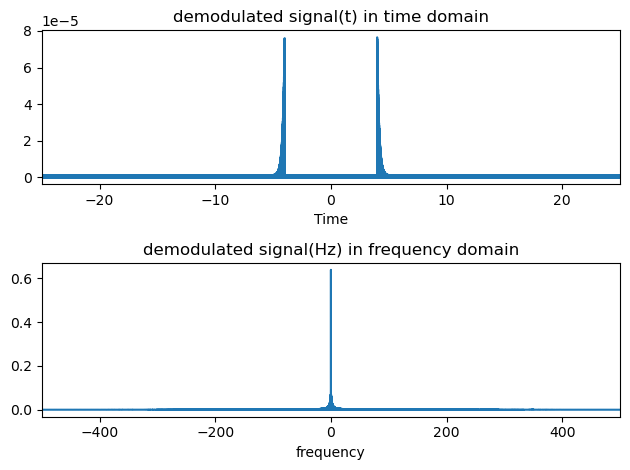

In [565]:
d = 0.0001
time = np.arange(-100 , 100 , d)

f_range = np.fft.fftfreq(N , 1/fs)
f_range = np.fft.fftshift(f_range)


def AM_envelope(R, C, fs, xc):

    envelope = np.zeros(len(xc))
    vc = np.zeros(len(xc))
    vc[0] = 0  # initial voltage across the capacitor

    # Compute the time step and the time constant
    dt = 1/fs
    tau = R*C

    # Process each sample of the input signal
    for s in range(len(xc) - 1):
        # Update the envelope
        envelope[s] = vc[s]

        # Update the state of the capacitor
        if xc[s+1] > vc[s]:
            vc[s+1] = xc[s+1]
        else:
            vc[s+1] = vc[s] * np.exp(-dt/tau)

    # Update the last sample of the envelope
    envelope[-1] = vc[-1]

    return envelope

y_envelope = AM_envelope(0.004 , 0.02 , fs , am_signal)

plt.subplot(2, 1, 1)
plt.plot(time , y_envelope)
plt.title("demodulated signal(t) in time domain") 
plt.xlabel('Time')
plt.xlim(-25,25)



# frequency domain
yf_envelope = np.fft.fft(y_envelope)
yf_envelope = np.fft.fftshift(yf_envelope)  



plt.subplot(2, 1, 2)
plt.plot(f_range , np.abs(yf_envelope) )
plt.title("demodulated signal(Hz) in frequency domain") 
plt.xlabel('frequency')
plt.xlim(-500,500)

plt.tight_layout()
plt.show()



## 1.5
Demodulate the modulated signal with a coherent detector shown in figure 2.

<pre>
                <img src="figure2.png" alt="Figure 2" width="400"/>
<pre>

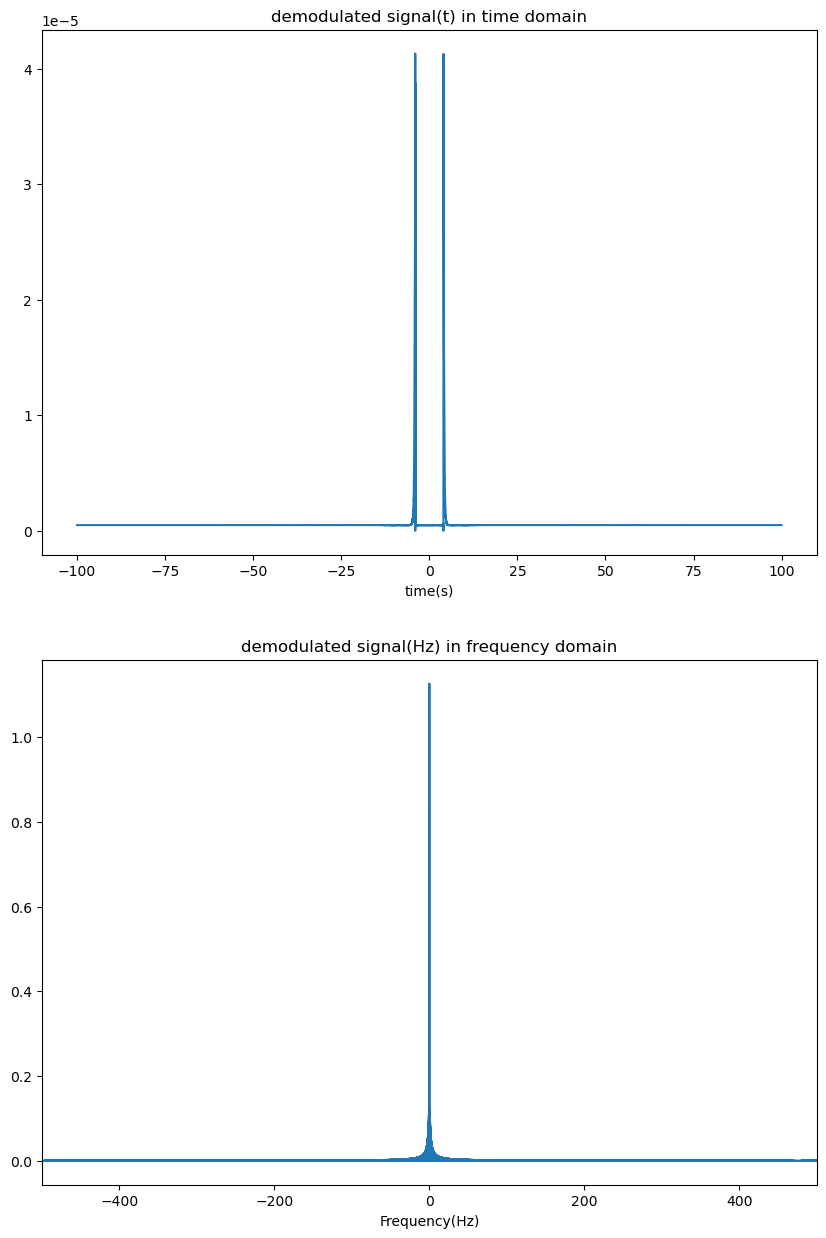

In [566]:
time = np.arange(-100 , 100 , 0.0001)

f_range = np.fft.fftfreq(N , 1/fs)  # make an freq range between (-400000 , 400000) ,step of sampling is 0.01
f_range = np.fft.fftshift(f_range)

local_carrier_creator = lambda t : np.cos(2 * np.pi * fc * t)
local_carrier = local_carrier_creator(time)

# Multiply the received signal with the local carrier signal
mixed_signal = am_signal * local_carrier
mixed_signal_f = np.fft.fft(mixed_signal)
mixed_signal_f = np.fft.fftshift(mixed_signal_f)


cutoff_freq = 500  # This should be less than the carrier frequency


lowpassFilter_maker = lambda f : np.heaviside(f+cutoff_freq , 1) - np.heaviside(f-cutoff_freq ,1)
lowpassFilter = lowpassFilter_maker(f_range)



mixed_signal_f = mixed_signal_f*lowpassFilter 

demodulated_signal = np.fft.ifftshift(mixed_signal_f)
demo_signal = np.fft.ifft(demodulated_signal)


# Plot the modulated signal
plt.figure(figsize=(10, 15))

plt.subplot(2, 1, 1)
plt.plot(time ,np.abs(demo_signal))
plt.title("demodulated signal(t) in time domain") 
plt.xlabel("time(s)")

plt.subplot(2, 1, 2)
plt.plot(f_range , np.abs(mixed_signal_f))
plt.title("demodulated signal(Hz) in frequency domain") 
plt.xlabel("Frequency(Hz)")
plt.xlim(-500 , 500)
plt.show()





## 1.6 

Compare the output of these two methods together and with the original signal. Which of these 2 demodulation methods perform more accurate?

<p style="font-size:22px; color:green;">
As you can see, the envelope detector output has a little ripple but this ripple doesn't exist in the coherent detector output and second one works more accurate.
If accuracy is your primary concern and you can afford the additional complexity, coherent detection is generally the better choice. However, if simplicity and cost are more important, envelope detection might be sufficient, especially for signals with a high carrier-to-noise ratio and simple modulation schemes.
</p>

## 1.7 
Modulate the primary signal using the Upper Single Side Band (USSB) method and create time and frequency domain plots. Then, demodulate the signal using the coherence demodulation method and generate time and frequency domain plots for the demodulated signal.

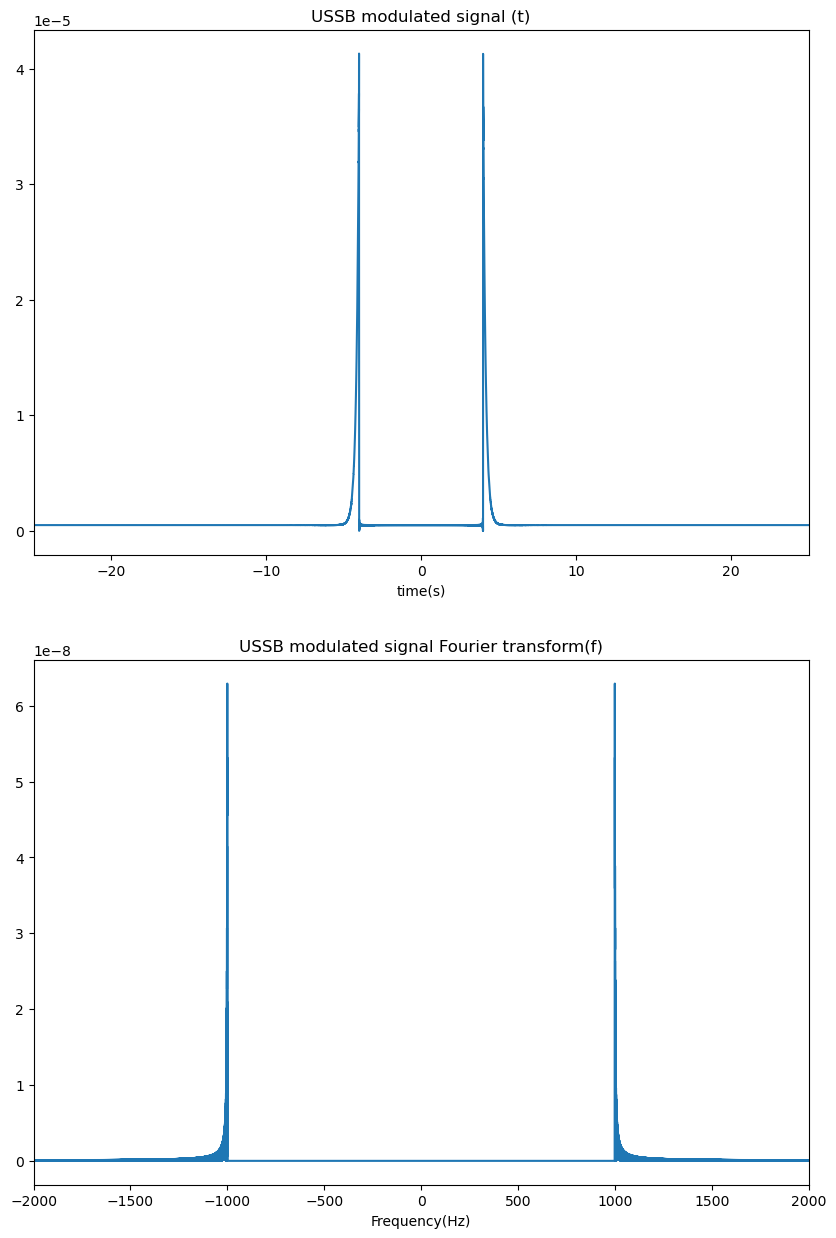

In [567]:
time = np.arange(-100 , 100 , 0.0001)

f_range = np.fft.fftfreq(N , 1/fs)  # make an freq range between (-400000 , 400000) ,step of sampling is 0.01
f_range = np.fft.fftshift(f_range)

def USSB_modulator(message , f_range , carrier_freq, t_range , BW = 500) : 
    #make a filter for USB
    
    filter = lambda f : np.heaviside(f - carrier_freq , 1)  + np.heaviside(-f - carrier_freq , 1)
    filter = filter(f_range)
    
    carrier_ussb_creator = lambda t : np.cos(2 * np.pi * carrier_freq * t)
    carrier_ussb = carrier_ussb_creator(t_range)

    #make fourier transform of carrier
    carrier_f = np.fft.fft(carrier_ussb)
    carrier_f = np.fft.fftshift(carrier_f)
    
    
    #multiply carrier and message in frequency domain
    mixed_signal = message * carrier_ussb
    
    
    #make fourier transform of carrier
    mixed_signal_f = np.fft.fft(mixed_signal)
    mixed_signal_f = np.fft.fftshift(mixed_signal_f)
    
    #multiply mixed signal and filter in frequency domain
    mixed_signal_f = mixed_signal_f*filter
    
    modulated_signal = np.fft.ifftshift(mixed_signal_f)
    modulated_signal = np.fft.ifft(demodulated_signal)


    
    # Plot the modulated signal
    plt.figure(figsize=(10, 15))

    plt.subplot(2, 1, 1)
    plt.plot(t_range , np.abs(modulated_signal))
    plt.xlim(-25,25)
    plt.title("USSB modulated signal (t)")
    plt.xlabel("time(s)")

    plt.subplot(2, 1, 2)
    plt.plot(f_range , np.abs(mixed_signal_f))
    plt.title("USSB modulated signal Fourier transform(f)")
    plt.xlabel("Frequency(Hz)")
    plt.xlim(-carrier_freq - 2*BW , carrier_freq + 2*BW)
    plt.show()
    
    return mixed_signal_f , modulated_signal
    
usb_f , usb = USSB_modulator(m , f_range , fc , time )
    
    

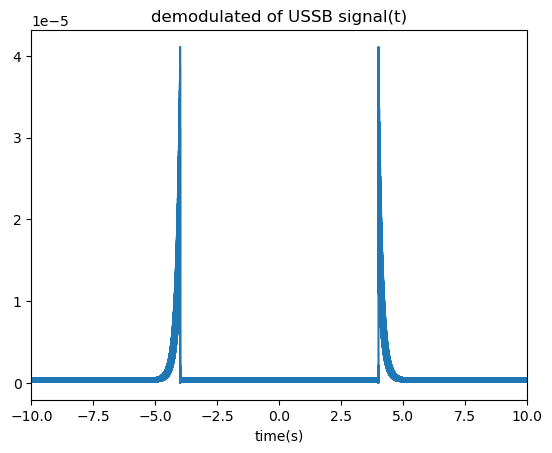

In [570]:
time = np.arange(-100 , 100 , 0.0001)
fc = 1000

f_range = np.fft.fftfreq(N , 1/fs)  # make an freq range between (-400000 , 400000) ,step of sampling is 0.01
f_range = np.fft.fftshift(f_range)

##### demodulation of USSB signal using Coherent method

local_carrier_creator = lambda t : np.cos(2 * np.pi * fc * t)
local_carrier = local_carrier_creator(time)

# Multiply the received signal with the local carrier signal
mixed_signal = usb * local_carrier


mixed_signal_f = np.fft.fft(mixed_signal)
mixed_signal_f = np.fft.fftshift(mixed_signal_f)




cutoff_freq = 500  # This should be less than the carrier frequency


lowpassFilter_maker = lambda f : np.heaviside(f+cutoff_freq , 1) - np.heaviside(f-cutoff_freq ,1)
lowpassFilter = lowpassFilter_maker(f_range)



#mixed_signal_f = mixed_signal_f*lowpassFilter 

demodulated_signal = np.fft.ifftshift(mixed_signal_f)
demo_signal_s = np.fft.ifft(demodulated_signal)


# Plot the modulated signal
plt.plot(time , np.abs(demo_signal_s))
plt.title("demodulated of USSB signal(t)")
plt.xlabel("time(s)")
plt.xlim(-10,10)
plt.show()






## 1.8
Repeat the previous part for LSSB modulation.

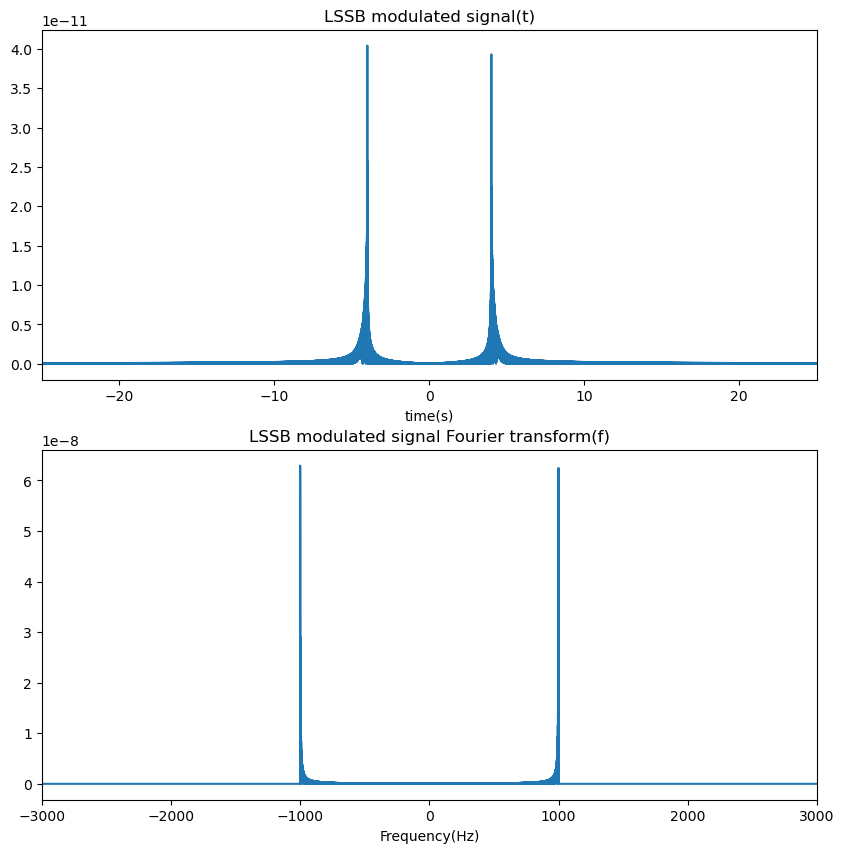

In [569]:
time = np.arange(-100 , 100 , 0.0001)

f_range = np.fft.fftfreq(N , 1/fs)  # make an freq range between (-400000 , 400000) ,step of sampling is 0.01
f_range = np.fft.fftshift(f_range)

def LSSB_modulator(message , f_range , carrier_freq, t_range , BW = 500) : 
    
    
    #make a filter for LSB 
    filter = lambda f : np.heaviside(f + carrier_freq , 1) - np.heaviside(f - carrier_freq , 1)
    filter = filter(f_range)
    
    
    #make carrier signal
    carrier_ussb_creator = lambda t : np.cos(2 * np.pi * carrier_freq * t)
    carrier_ussb = carrier_ussb_creator(t_range)



    #multiply carrier and message in frequency domain
    mixed_signal = message * carrier_ussb
    
    
    #make fourier transform of carrier
    mixed_signal_f = np.fft.fft(mixed_signal)
    mixed_signal_f = np.fft.fftshift(mixed_signal_f)
    
    #multiply mixed signal and filter in frequency domain
    mixed_signal_f = mixed_signal_f*filter
    
    modulated_signal = np.fft.ifftshift(mixed_signal_f)
    modulated_signal = np.fft.ifft(modulated_signal)

    
    # Plot the modulated signal
    plt.figure(figsize=(10, 10))

    plt.subplot(2, 1, 1)
    plt.plot(t_range , np.abs(modulated_signal))
    plt.xlim(-25,25)
    plt.title("LSSB modulated signal(t)")
    plt.xlabel("time(s)")

    plt.subplot(2, 1, 2)
    plt.plot(f_range , np.abs(mixed_signal_f))
    plt.title("LSSB modulated signal Fourier transform(f)")
    plt.xlabel("Frequency(Hz)")
    plt.xlim(-carrier_freq - 4*BW , carrier_freq + 4*BW)
    plt.show()
    
    return mixed_signal_f , modulated_signal
    

lsb_f , lsb = LSSB_modulator(m , f_range , fc , time )
    

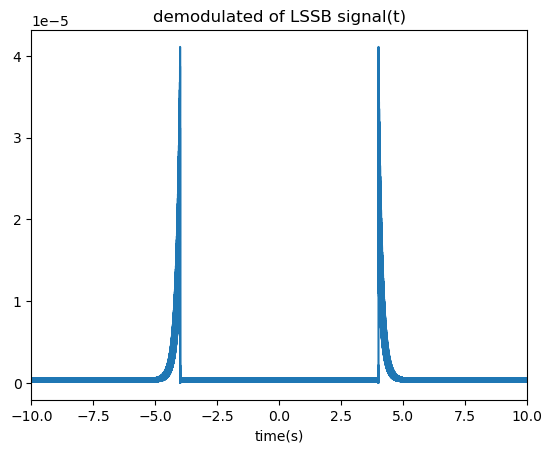

In [572]:
time = np.arange(-100 , 100 , 0.0001)
fc = 1000
f_range = np.fft.fftfreq(N , 1/fs)  # make an freq range between (-400000 , 400000) ,step of sampling is 0.01
f_range = np.fft.fftshift(f_range)

##### demodulation of USSB signal using Coherent method

local_carrier_creator = lambda t : np.cos(2 * np.pi * fc * time)
local_carrier = local_carrier_creator(time)

# Multiply the received signal with the local carrier signal
mixed_signal = usb * local_carrier


mixed_signal_f = np.fft.fft(mixed_signal)
mixed_signal_f = np.fft.fftshift(mixed_signal_f)


cutoff_freq = 500  # This should be less than the carrier frequency


lowpassFilter_maker = lambda f : np.heaviside(f+cutoff_freq , 1) - np.heaviside(f-cutoff_freq ,1)
lowpassFilter = lowpassFilter_maker(f_range)


mixed_signal_f = mixed_signal_f*lowpassFilter 

demodulated_signal = np.fft.ifftshift(mixed_signal_f)
demo_signal = np.fft.ifft(demodulated_signal)



# Plot the modulated signal
plt.plot(time ,np.abs(demo_signal_s))
plt.title("demodulated of LSSB signal(t)")
plt.xlabel("time(s)")
plt.xlim(-10,10)
plt.show()





## 1.9 
Compare the original message with the AM, USSB, and LSSB output and explain the reason for the difference. Also, compare the advantages and disadvantages of these three modulation methods.


properties of each modulation : 

<p style="font-size:22px; color:green;">
1. Amplitude Modulation (AM):
Output Characteristics: In AM, the original message signal is modulated by varying the amplitude of a carrier signal. The output signal includes sidebands (upper and lower sidebands) around the carrier frequency, carrying the message signal information.
<p>
<p style="font-size:22px; color:green;">
Reason for Difference: The amplitude of the carrier signal is directly proportional to the instantaneous amplitude of the message signal. Therefore, the amplitude variations in the message signal are reflected in the amplitude variations of the carrier signal.
<p>

<p style="font-size:22px; color:green;">
2. Upper Sideband (USSB):
Output Characteristics: In Upper Sideband modulation, only the upper sideband of the AM signal is transmitted, and the lower sideband is suppressed.
<p>

<p style="font-size:22px; color:green;">
Reason for Difference: USSB is a result of filtering or suppressing one of the sidebands. This can be done for efficiency in transmission bandwidth or power usage, but it requires more complex demodulation at the receiver.
<p>

<p style="font-size:22px; color:green;">
3. Lower Sideband (LSSB):
Output Characteristics: In Lower Sideband modulation, only the lower sideband of the AM signal is transmitted, and the upper sideband is suppressed.
Reason for Difference: Similar to USSB, LSSB involves suppressing one of the sidebands. The choice between USSB and LSSB is often arbitrary and depends on the specific application or standard.
</p>


Comparison of Advantages and Disadvantages:

<p style="font-size:22px; color:green;">
1. Amplitude Modulation (AM):
Advantages:
Simplicity in modulation and demodulation.
Widespread use in broadcast radio.
Compatibility with analog audio signals.


<p style="font-size:22px; color:green;">
Disadvantages:
Inefficient use of power and bandwidth.
Susceptible to noise and interference.
Limited in terms of signal-to-noise ratio.
<p>

<p style="font-size:22px; color:green;">
2. Upper Sideband (USSB):
Advantages:
More efficient use of bandwidth compared to full AM.
Less susceptible to interference in the suppressed sideband.
<p>

<p style="font-size:22px; color:green;">
Disadvantages:
Requires more complex demodulation.
Phase-sensitive demodulation is necessary.
<p>

<p style="font-size:22px; color:green;">
3. Lower Sideband (LSSB):
Advantages:
Similar advantages to USSB.
Choice between USSB and LSSB is often arbitrary.
</p>


<p style="font-size:22px; color:green;">
Disadvantages:
More complex demodulation.
Phase-sensitive demodulation is necessary.
</p>


<p style="font-size:22px; color:green;">
The selection of a modulation method depends on the specific application's requirements for bandwidth, power efficiency, and resistance to noise and interference. Each modulation method has its strengths and weaknesses, and the choice should be made based on the priorities and constraints of the particular communication system.
</p>

## 1.10
Use a microphone to record your voice . Then, apply the AM modulation method that you used in the second part of this question to your speech signal and plot the spectrum of the modulated signal. Next, use the two demodulation methods that you studied in the question to recover your speech signal and compare the outputs.

In [573]:
### for make an audio file 

# Set the duration and sample rate
duration = 5  # seconds
fs = 44100  # Sample rate

# Record audio
myrecording = sd.rec(int(duration * fs), samplerate=fs, channels=1)
sd.wait()  # Wait until recording is finished

# Save as a WAV file
write('record.wav', fs, myrecording)

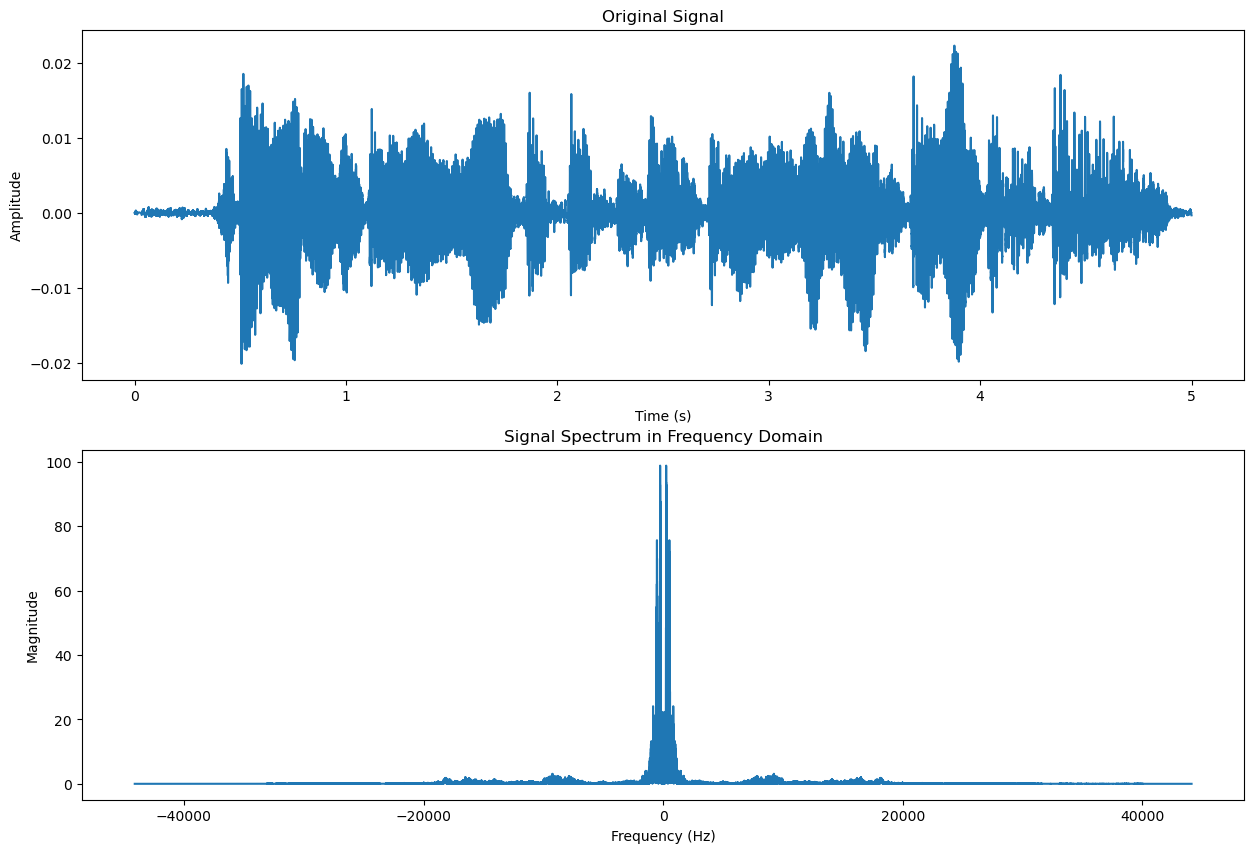

Bandwidth of the signal respect to plot : 10000 Hz


In [574]:
# Open the WAV file
fs, data = read('record.wav')

# Create a time array
t = np.arange(len(data))/fs

data_f = np.fft.fft(data)
data_f = np.fft.fftshift(data_f)

# Calculate the frequency range
f_range = np.fft.fftfreq(len(data), 1/(2*fs))
f_range = np.fft.fftshift(f_range)

# Find the bandwidth
bandwidth = np.max(np.abs(f_range))

# Print the bandwidth

# Plot the spectrum
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)   
plt.plot(t, data)
plt.title("Original Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.subplot(2, 1, 2)
plt.plot(f_range, np.abs(data_f))
plt.title("Signal Spectrum in Frequency Domain")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

BW = 10000

print("Bandwidth of the signal respect to plot :", BW, "Hz")



/var/folders/21/jvt_k93x2l76ygs0vp656np80000gn/T/ipykernel_7681/3872768992.py:25: ComplexWarning: Casting complex values to real discards the imaginary part
  modulated_data = np.int16(modulated_data)


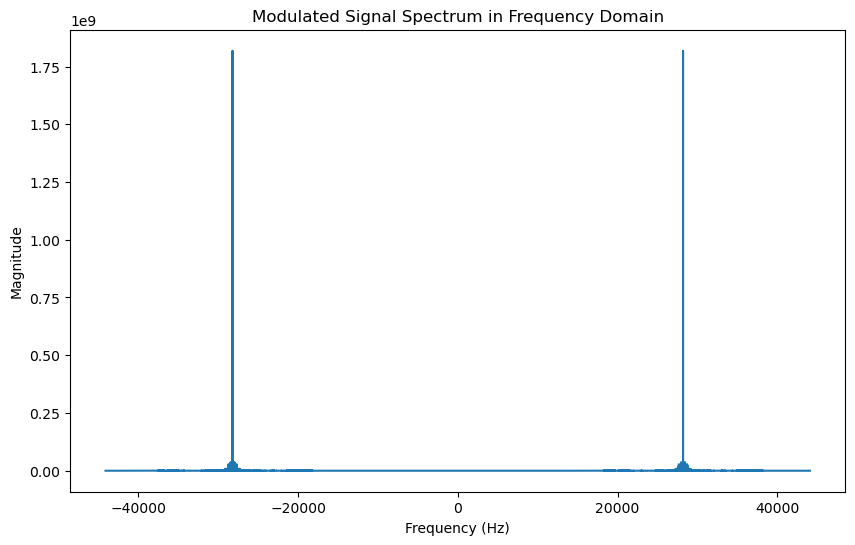

In [575]:
####AM modulation of the recorded signal


# Set modulation frequency and index
modulation_frequency = 3*BW  # Hz
modulation_index = 1/np.max(np.abs(data))

data_f[f_range > BW] = 0
data_f[f_range < -BW] = 0

new_data = np.fft.ifftshift(data_f)
new_data = np.fft.ifft(new_data)


# Create the modulating signal
modulator = np.cos(2.0 * np.pi * modulation_frequency * t)

# Perform amplitude modulation
modulated_data = modulator * (1.0 + modulation_index * new_data)

# Ensure that highest value is in 16-bit range
modulated_data = (modulated_data / np.max(np.abs(modulated_data))) * 32767

# Convert to 16-bit data
modulated_data = np.int16(modulated_data)

# Plot the spectrum
modulated_data_f = np.fft.fft(modulated_data)
modulated_data_f = np.fft.fftshift(modulated_data_f)


# Plot the spectrum
plt.figure(figsize=(10, 6))
plt.plot(f_range, np.abs(modulated_data_f))
plt.title("Modulated Signal Spectrum in Frequency Domain")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()


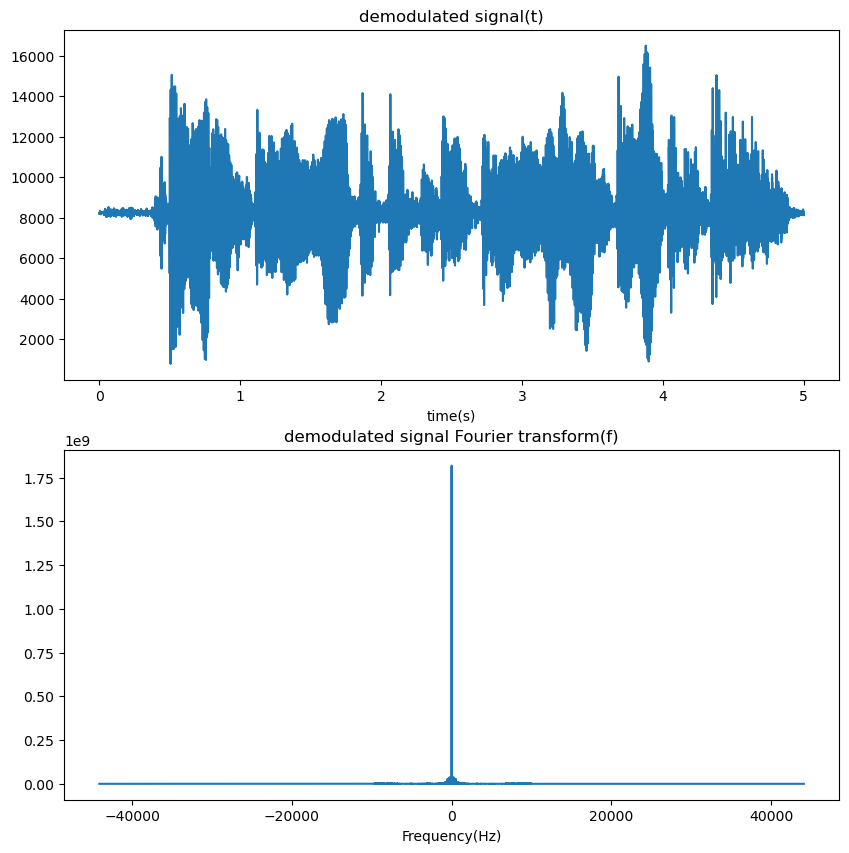

In [576]:
##### demodulation of AM signal using Coherent method


local_carrier_creator = lambda t : np.cos(2 * np.pi * modulation_frequency * t)
local_carrier = local_carrier_creator(t)

# Multiply the received signal with the local carrier signal
mixed_signal = modulated_data * local_carrier

mixed_signal_f = np.fft.fft(mixed_signal)
mixed_signal_f = np.fft.fftshift(mixed_signal_f)


cutoff_freq = 10000  # This should be less than the carrier frequency


lowpassFilter_maker = lambda f : np.heaviside(f+ cutoff_freq , 1) - np.heaviside(f-cutoff_freq ,1)
lowpassFilter = lowpassFilter_maker(f_range)



mixed_signal_f = mixed_signal_f*lowpassFilter 

demodulated_signal = np.fft.ifftshift(mixed_signal_f)
demo_signal = np.fft.ifft(demodulated_signal)


# Plot the modulated signal
plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.plot(t ,np.abs(demo_signal))
plt.title("demodulated signal(t)")
plt.xlabel("time(s)")


plt.subplot(2, 1, 2)
plt.plot(f_range , np.abs(mixed_signal_f))
plt.title("demodulated signal Fourier transform(f)")
plt.xlabel("Frequency(Hz)")
plt.show()





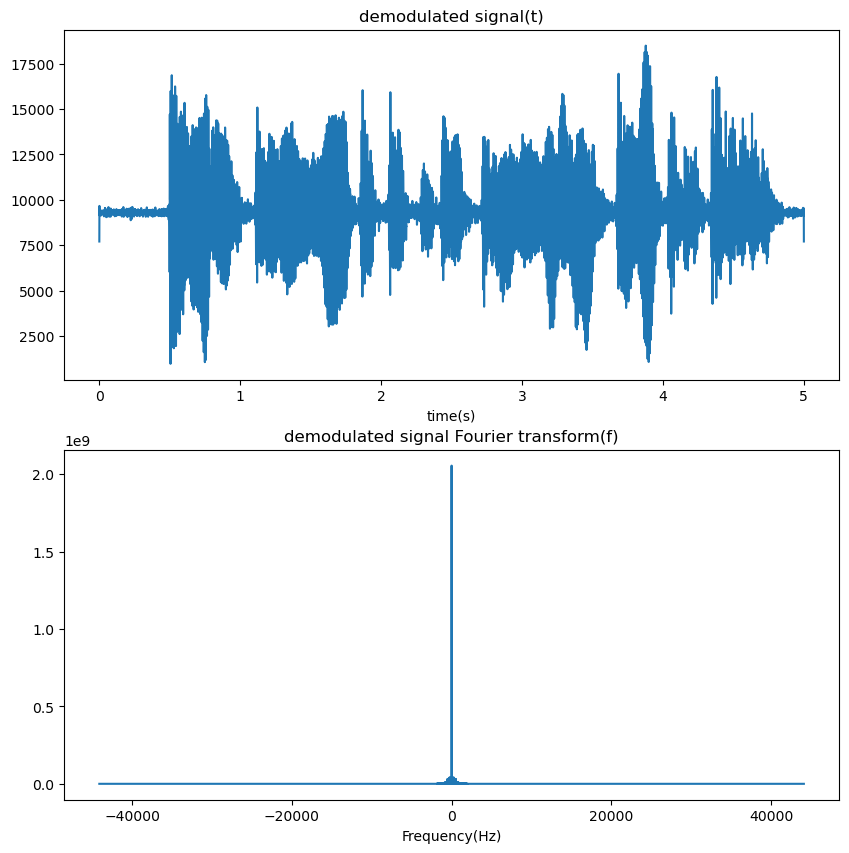

In [577]:
##### demodulation of AM signal using envelope detector method
R = 0.001
C = 0.05
y_envelope = AM_envelope(R , C , fs , modulated_data)

# frequency domain
yf_envelope = np.fft.fft(y_envelope)
yf_envelope = np.fft.fftshift(yf_envelope)  

yf_envelope[f_range > BW/5] = 0
yf_envelope[f_range < -BW/5] = 0

y_envelope = np.fft.ifftshift(yf_envelope)
y_envelope = np.fft.ifft(y_envelope)

plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.plot(t ,np.abs(y_envelope))
plt.title("demodulated signal(t)")
plt.xlabel("time(s)")


plt.subplot(2, 1, 2)
plt.plot(f_range , np.abs(yf_envelope))
plt.title("demodulated signal Fourier transform(f)")
plt.xlabel("Frequency(Hz)")
plt.show()



<p style="font-size:22px; color:green;">
As you can see, our conclusion about the coherent method and envelope detector was right and coherent method output is more accurate.
beside that, in our envelope detector output, a lot of noise has been added to our signal and without aliasing it has a lot of difference that will show you in the below plot.
</p>

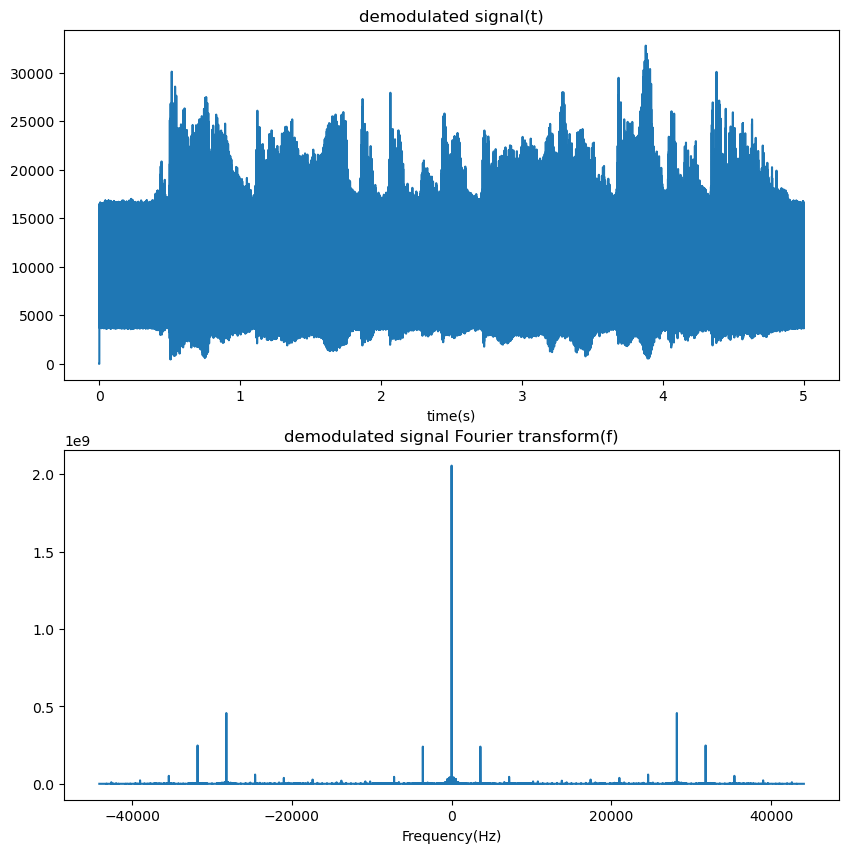

In [579]:
##### demodulation of AM signal using envelope detector method
R = 0.001
C = 0.05
y_envelope = AM_envelope(R , C , fs , modulated_data)

# frequency domain
yf_envelope = np.fft.fft(y_envelope)
yf_envelope = np.fft.fftshift(yf_envelope)  

plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.plot(t ,np.abs(y_envelope))
plt.title("demodulated signal(t)")
plt.xlabel("time(s)")


plt.subplot(2, 1, 2)
plt.plot(f_range , np.abs(yf_envelope))
plt.title("demodulated signal Fourier transform(f)")
plt.xlabel("Frequency(Hz)")
plt.show()



# 2 Frequency Modulation
In this section, we want to obtain the sent message from its FM modulated signal with three methods. We call the sent message m(t) and we have:

\begin{equation}
m(t) = sin(25\pi t) \quad  (0 \leq t \leq 1)
\end{equation}


## 2.1
Sample this message at $f_s = 10$ kHz and obtain the FM signal with the following values.
\begin{equation}
x_c(t) = A_ccos(2\pi f_ct + 2\pi f_{\Delta}\int_0^tm(\tau)d\tau)  \quad  (A_c=1 , f_c=200Hz , f_{\Delta} = 30 Hz/v)
\end{equation}




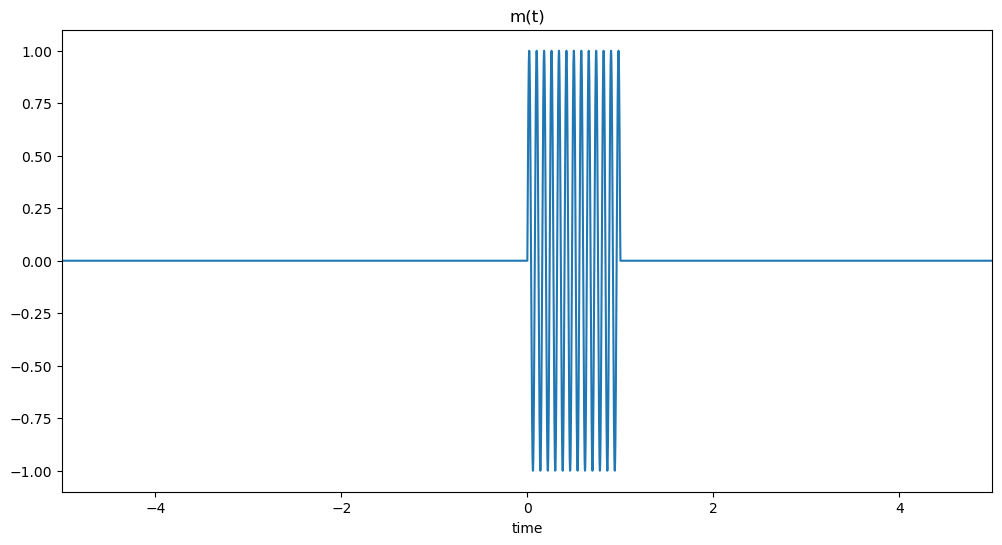

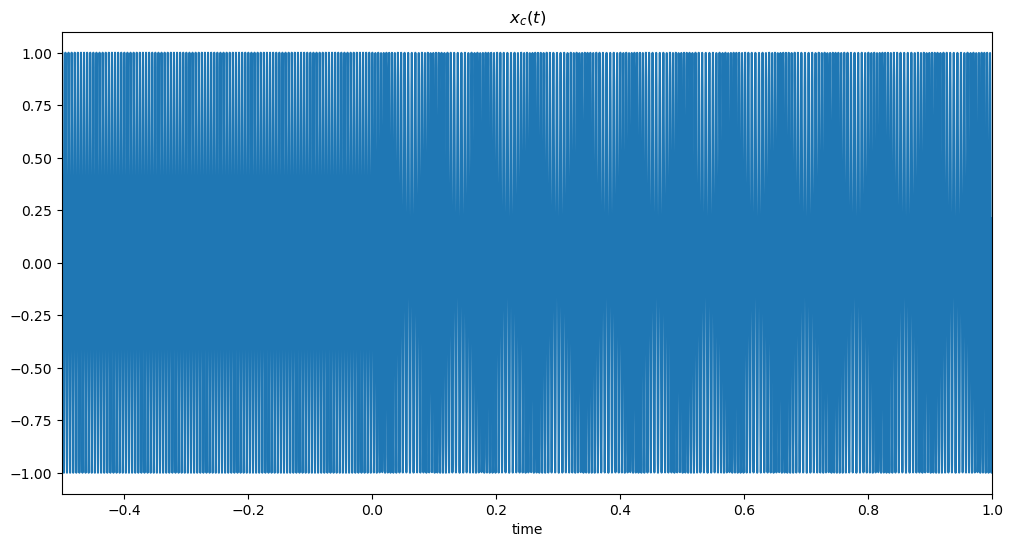

In [580]:
Ac = 1
fc = 200
fd = 30  
fs = 10000


time = np.arange(-10 ,10 , 1/fs)

 
m_maker = lambda t : np.sin(25*np.pi*t)
m = m_maker(time)

m[time < 0] = 0
m[time > 1] = 0 


filter_maker = lambda t : np.heaviside(t , 1) - np.heaviside(t - 1 , 1)
filter = filter_maker(time)


phase = [0]
for i in range(1, len(m)):
    phase.append(phase[i-1] + (fc + fd * m[i]))
phase = np.array(phase) * 2 * np.pi / fs

    
xc = Ac * np.cos(phase)



plt.figure(figsize=(12,6))

plt.plot(time, m)
plt.title('m(t)')
plt.xlabel("time")
plt.xlim(-5 , 5)
plt.show()


plt.figure(figsize=(12,6))

plt.plot(time, xc)
plt.title('$x_c(t)$')
plt.xlabel("time")
plt.xlim(-0.5 , 1 )
plt.show()


## 2.2
With the help of scipy.signal.detrend and scipy.signal.hilbert command, restore the message signal ideally.

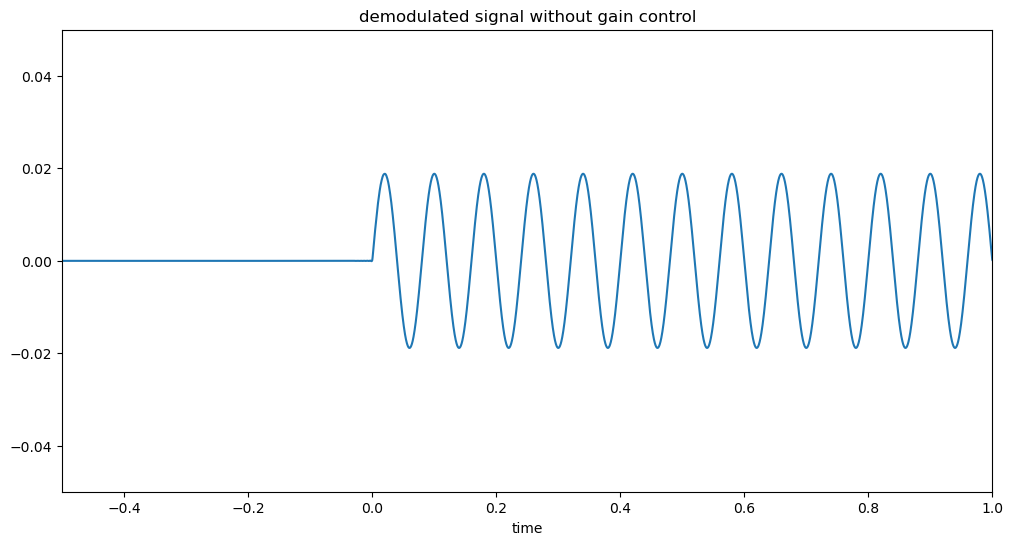

In [581]:
time = np.arange(-10 ,10 , 1/fs)

demod = np.diff(np.unwrap(np.angle(hilbert(xc))))
demod = np.concatenate([demod, [0]])  # to maintain the same length after differentiation
demod1 = detrend(demod) 

plt.figure(figsize=(12, 6))

plt.plot(time, demod1)
plt.title('demodulated signal without gain control')
plt.xlabel("time")
plt.xlim(-0.5,1)
plt.ylim(-0.05,0.05)
plt.show()


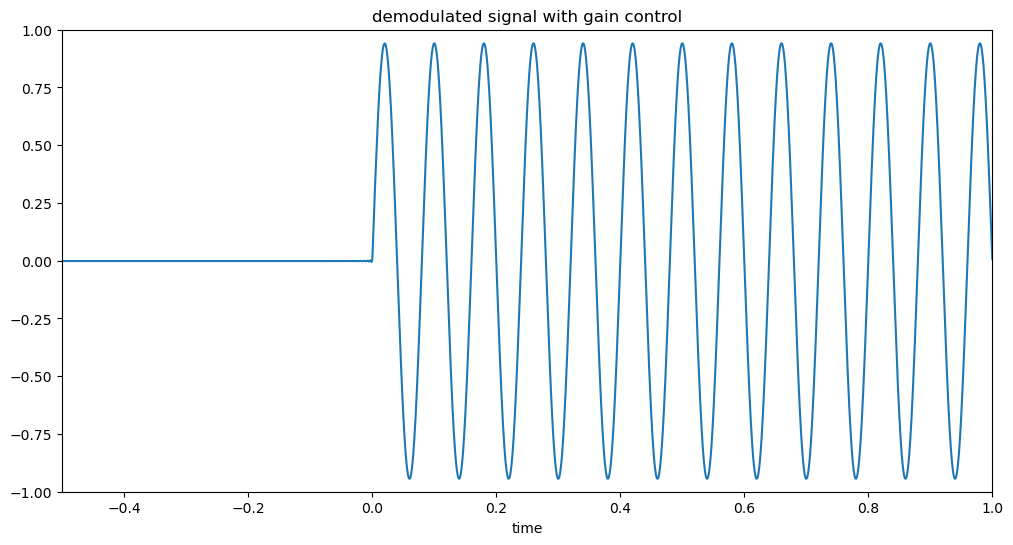

In [582]:
time = np.arange(-10 ,10 , 1/fs)

plt.figure(figsize=(12, 6))

plt.plot(time, demod1 * 50 )
plt.title('demodulated signal with gain control')
plt.xlabel("time")
plt.xlim(-0.5,1)
plt.ylim(-1,1)
plt.show()

## 2.3
Taking the derivative of the signal $x_c(t)$ we will have:

\begin{equation}
x_c(t) = -A_c * (2\pi f_c + 2\pi f_{\Delta}m(t)) * sin(2\pi f_ct + 2\pi f_{\Delta}\int_0^tm(\tau)d\tau)
\end{equation}

If the frequency changes $sin(2πf_ct+2πf_∆\int_0^tm(\tau)d\tau)$ of the signal due to the message m(t) are 
ignored compared to the frequency $f_c$, ($f_∆m(t) ≈ 0$) we can consider the $x_d$ signal as an AM $f_c$ signal whose envelope contains the desired message. Restore the message using the Envelope Detector made in the first problem with new values for the resistor and capacitor.


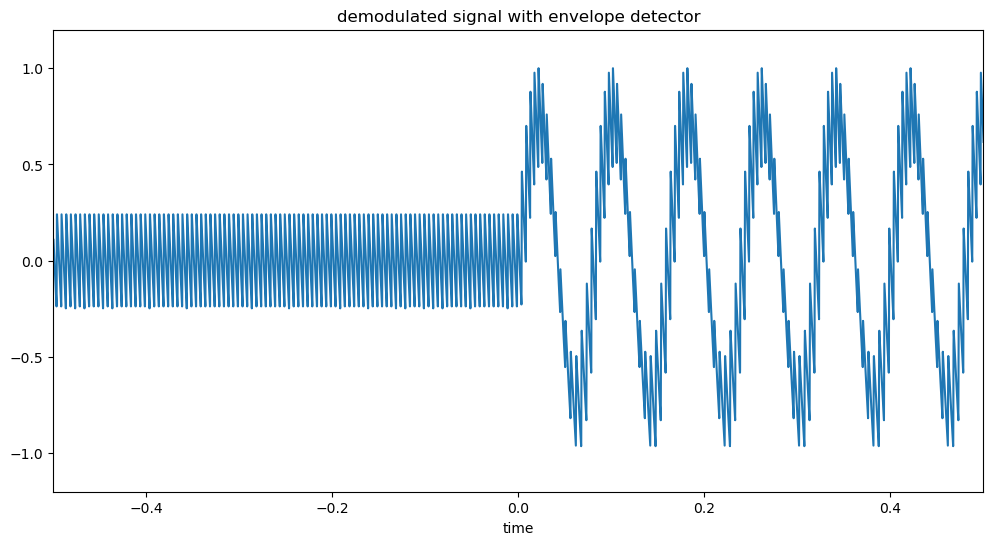

In [585]:
time = np.arange(-10 ,10 , 1/fs)
xd = -Ac * ((2 * np.pi * fc ) + (2 * np.pi * fd * m)) * np.sin(phase)
R = 0.9
C = 0.050
dmod2 = AM_envelope(R , C , fs , xd)
dmod2 = dmod2 - np.mean(dmod2)
dmod2 = dmod2/np.max(dmod2)

plt.figure(figsize=(12,6))
plt.plot(time , dmod2 )
plt.ylim(-1.2 , 1.2)
plt.xlim(-0.5 , 0.5)
plt.title('demodulated signal with envelope detector')
plt.xlabel("time")
plt.show()

## 2.4
We can also extract the message from the FM signal by using a "Zero Crossing Detector". This method is based on the fact that the message value influences the instantaneous frequency of the FM signal. When the message value is high, the instantaneous frequency is also high, and when the message value is low, the instantaneous frequency is low. Therefore, we can estimate the frequency of the signal by counting the number of times it crosses zero. A high frequency signal will have more zero crossings than a low frequency signal. The block diagram in Figure 3 shows how we can use a Zero Crossing Detector to reveal the message from the FM signal

<pre>
                <img src="figure3.png" alt="Figure 3" width="1000">
<pre>

A Zero Crossing Detector block can be implemented by taking the derivative of the signal sign(xc(t)) and then finding the absolute value of the result.
This will give us the locations where the signal crossed zero. The output of this block should be one only when a zero crossing occurs and zero otherwise.
A Pulse Generator block can then produce a rectangular pulse for a short duration for each zero crossing. This way, we can recover the message from the FM signal.

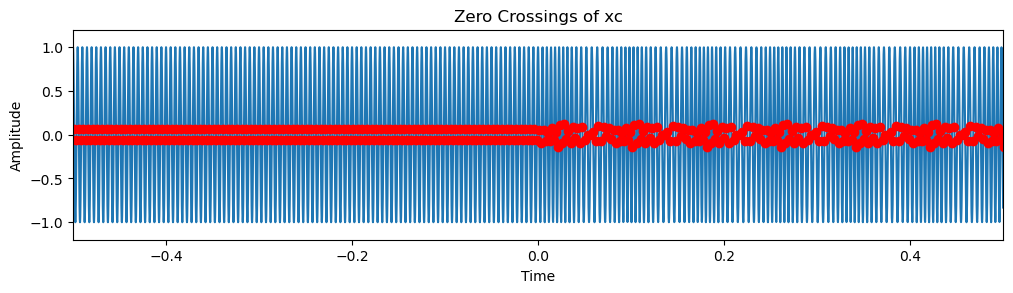

In [586]:
def zero_crossings(signal):
    return np.where(np.diff(np.sign(signal)))[0]

crossings = zero_crossings(xc)
time = np.arange(-10 ,10 , 1/fs)


plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(time, xc)
plt.plot(time[crossings], xc[crossings], 'ro')
plt.title('Zero Crossings of xc')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.xlim(- 0.5 , 0.5)
plt.ylim(-1.2, 1.2)
plt.show()


(-0.03, 0.03)

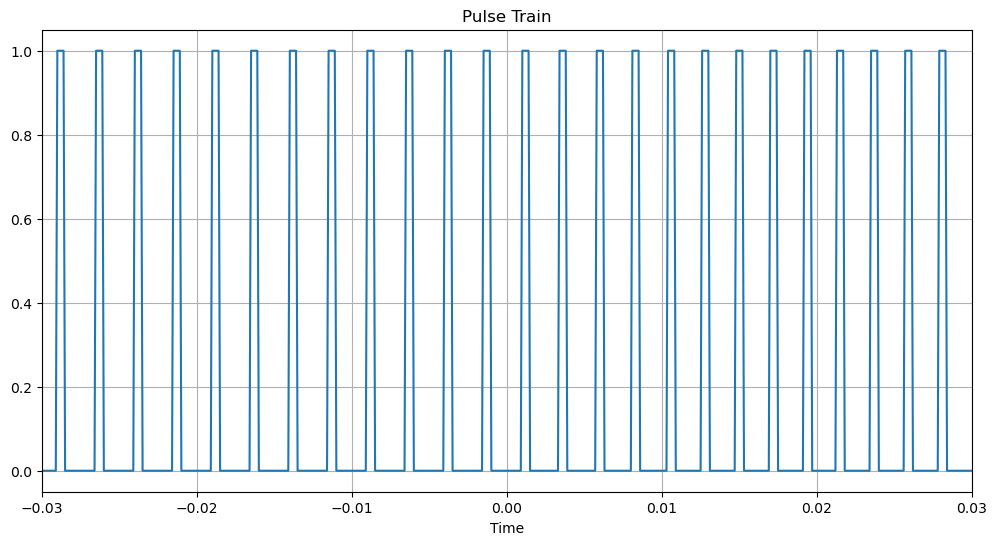

In [587]:
def pulse_generator(zero_crossings, signal_length, pulse_width):
    pulse_signal = np.zeros(signal_length)
    pulse_signal[zero_crossings] = 1
    pulse = np.ones(pulse_width)
    pulse_signal = np.convolve(pulse_signal, pulse, mode='same')
    pulse_signal = pulse_signal / np.max(pulse_signal)
    
    return pulse_signal

pulse_train = pulse_generator(crossings, len(time) , 5)

time = np.arange(-10 ,10 , 1/fs)

plt.figure(figsize=(12, 6))

plt.plot(time, pulse_train)
plt.xlabel('Time')
plt.title('Pulse Train')
plt.grid()
plt.xlim(-0.03, 0.03)


In [507]:
def dc_block(signal, cutoff, fs = fs , order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    y = lfilter(b, a, signal)
    return y

/Users/mohammadkazzazi/anaconda3/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


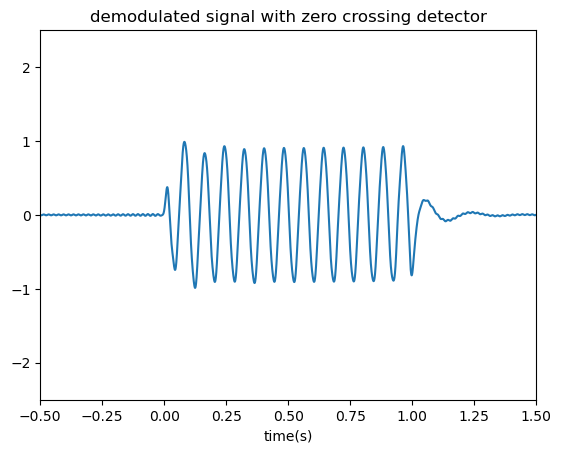

In [590]:
time = np.arange(-10 ,10 , 1/fs)

f_range = np.fft.fftfreq(len(time), 100 / len(time))
f_range = np.fft.fftshift(f_range)

pulse_train_f = np.fft.fft(pulse_train)
pulse_train_f = np.fft.fftshift(pulse_train_f)


filter_maker = lambda f : np.heaviside(f + 10 , 1) - np.heaviside(f - 10 , 1)
filter = filter_maker(f_range)


pulse_train_f = pulse_train_f * filter

pulse_train = np.fft.ifftshift(pulse_train_f)
pulse_train = np.fft.ifft(pulse_train)

cutoff_freq  = 5
demod3 = dc_block(pulse_train , cutoff_freq)

plt.plot( time , demod3 * 30 )
plt.title('demodulated signal with zero crossing detector')
plt.xlabel("time(s)")
plt.xlim(-0.5 , 1.5)
plt.ylim(-2.5 , 2.5)
plt.show()  



## 2.5
On a graph, plot the message, the FM signal of the message, and the messages retrieved in the three methods.

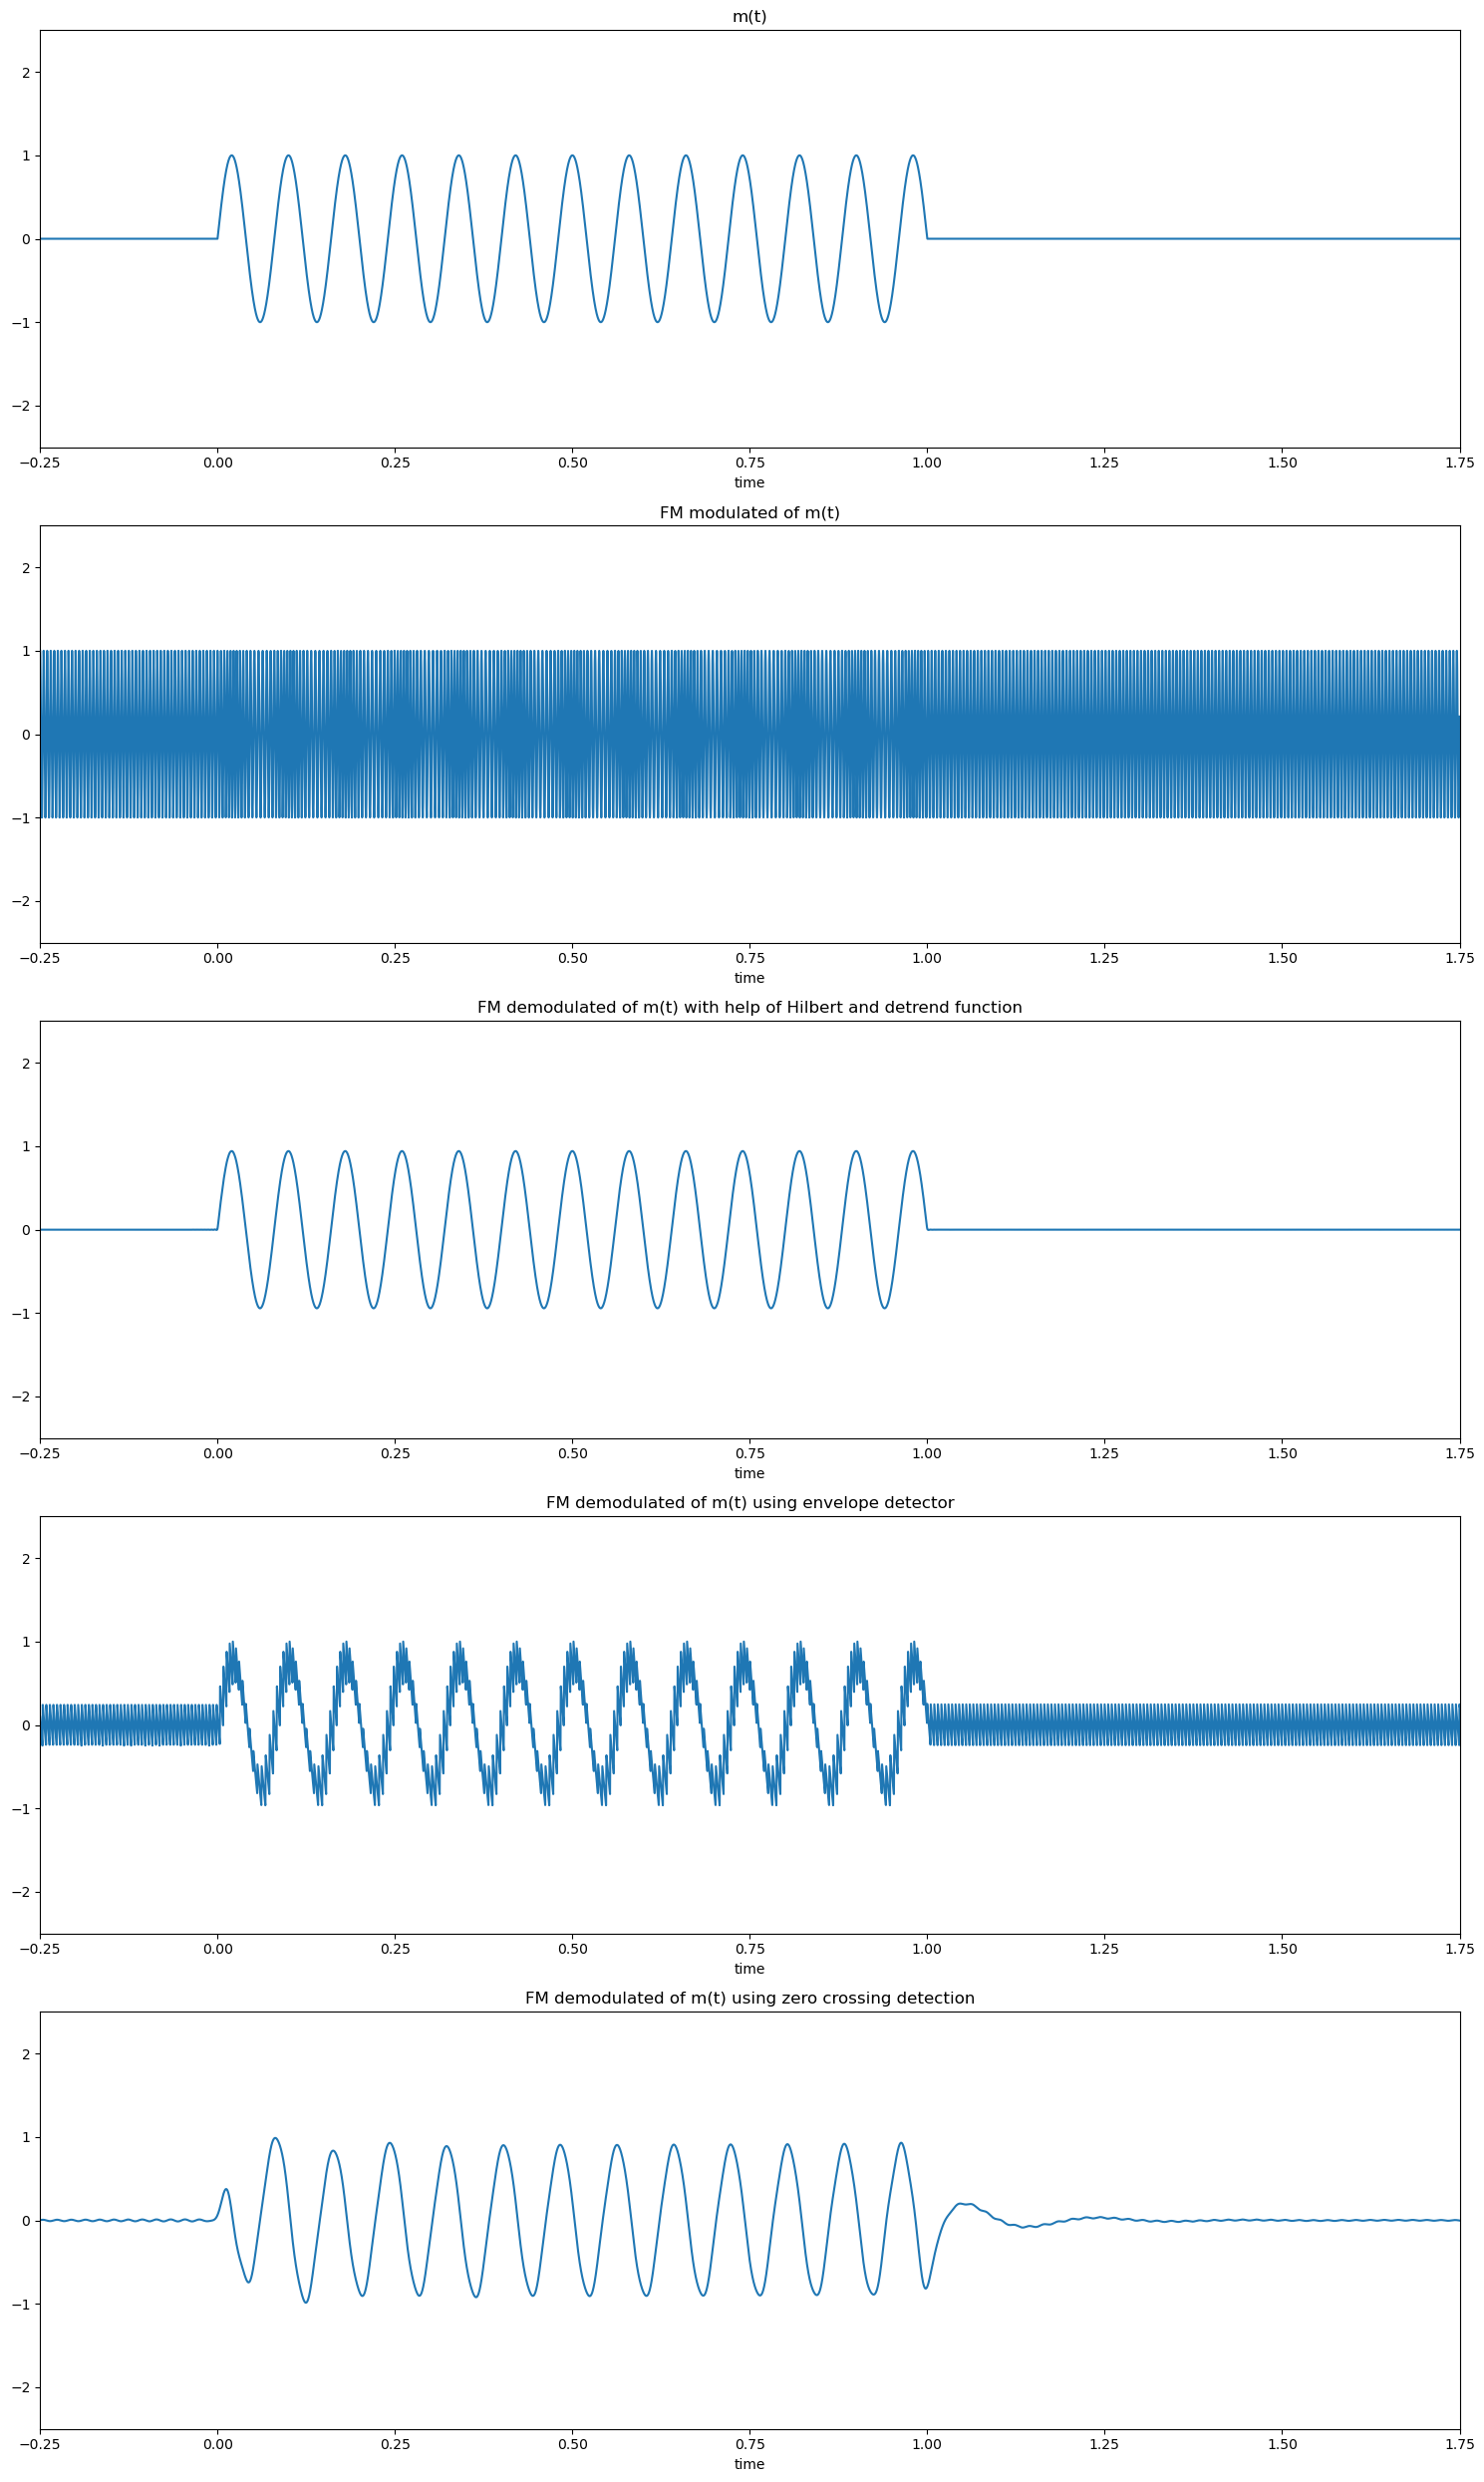

In [591]:
plt.figure(figsize=(15,25))

plt.subplot(5,1,1)
plt.plot(time, m)
plt.title('m(t)')
plt.xlabel("time")
plt.xlim(-0.25 , 1.75)
plt.ylim(-2.5 , 2.5)


plt.subplot(5,1,2)
plt.plot(time, xc)
plt.title('FM modulated of m(t)')
plt.xlabel("time")
plt.xlim(-0.25 , 1.75)
plt.ylim(-2.5 , 2.5)


plt.subplot(5,1,3)
plt.plot(time, demod1 * 50)
plt.title('FM demodulated of m(t) with help of Hilbert and detrend function')
plt.xlabel("time")
plt.xlim(-0.25 , 1.75)
plt.ylim(-2.5 , 2.5)


plt.subplot(5,1,4)
plt.plot(time, dmod2)
plt.title('FM demodulated of m(t) using envelope detector')
plt.xlabel("time")
plt.xlim(-0.25 , 1.75)
plt.ylim(-2.5 , 2.5)



plt.subplot(5,1,5)
plt.plot(time, demod3 * 30)
plt.title('FM demodulated of m(t) using zero crossing detection')
plt.xlabel("time")
plt.xlim(-0.25 , 1.75)
plt.ylim(-2.5 , 2.5)


plt.tight_layout()
plt.show()
